In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

import tqdm as tq
from tqdm import tqdm

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.0
IPython version      : 7.30.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Git hash: 52cf609a5544f1bd8bba1ddee4a086289626352c

pandas    : 1.3.5
watermark : 2.2.0
matplotlib: 3.5.1
tqdm      : 4.62.3
numpy     : 1.22.0



Generate the initial 3D figure

C:\Users\Amma\AppData\Local\Temp/ipykernel_9188/2089625324.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(-150.0, 5.0)

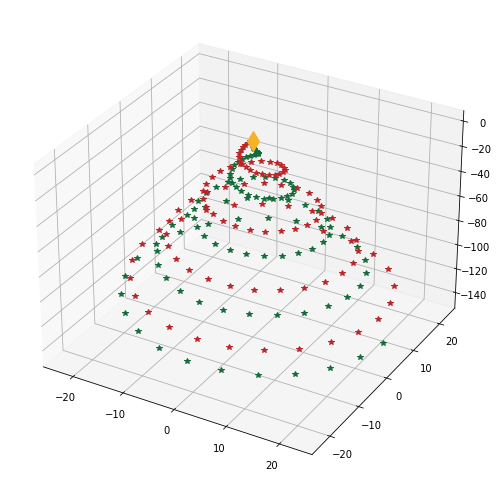

In [3]:
fig = plt.figure(figsize=(8.8, 8.8))
ax = fig.gca(projection="3d")

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

r = 4 * np.pi + theta
z = -5 * r
x = r * np.cos(theta)
y = r * np.sin(theta)

ax.plot(x, y, z, "*", color="#146B3A")

r2 = 4 * np.pi + theta + np.pi / 2
z2 = -5 * r2 + 5 * np.pi
x2 = r * np.cos(theta + np.pi / 2)
y2 = r * np.sin(theta + np.pi / 2)

ax.plot(x2, y2, z2, "*", color="#BB2528")

ax.scatter3D(0, 0, 5, color="#F8B229", s=200, marker="d")

ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

Write the animate function that will produce the individual frames

C:\Users\Amma\AppData\Local\Temp/ipykernel_9188/802909703.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


(<mpl_toolkits.mplot3d.art3d.Line3D at 0x1db54b924d0>,
 <mpl_toolkits.mplot3d.art3d.Line3D at 0x1db54b92740>)

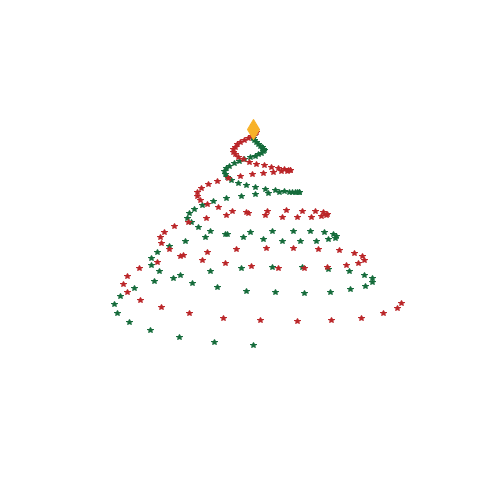

In [4]:
fig = plt.figure(figsize=(8.8, 8.8))
ax = fig.gca(projection="3d")

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

(line1,) = ax.plot([], [], [], "*", color="#146B3A")
(line2,) = ax.plot([], [], [], "*", color="#BB2528")

ax.set_axis_off()
ax.view_init(10, 0)


def animate(i):
    speed = 50
    theta_t = theta - i / speed * np.pi

    r = 4 * np.pi + theta
    z = -5 * r
    x = r * np.cos(theta_t)
    y = r * np.sin(theta_t)

    r2 = 4 * np.pi + theta + np.pi / 2
    z2 = -5 * r2 + 5 * np.pi
    x2 = r * np.cos(theta_t + np.pi / 2)
    y2 = r * np.sin(theta_t + np.pi / 2)

    line1.set_data_3d(x, y, z)
    line2.set_data_3d(x2, y2, z2)
    ax.scatter3D(0, 0, 5, color="#F8B229", s=200, marker="d")

    return (line1, line2)


animate(0)

Finally, combine it all into the full animation.

for windows, choco install ffmpeg
for linux, plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'


C:\Users\Amma\AppData\Local\Temp/ipykernel_9188/537128790.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 4371/4950 [00:01<00:00, 6014.94it/s]

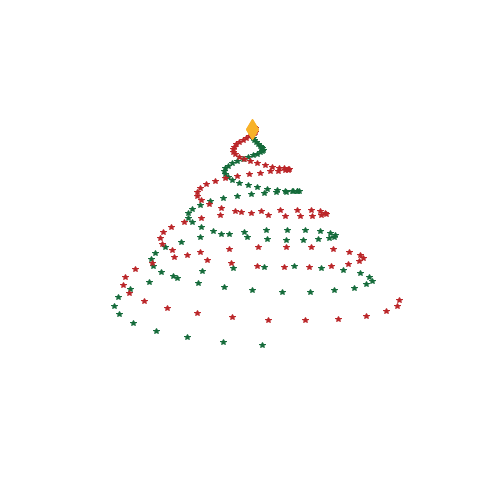

In [5]:
fig = plt.figure(figsize=(8.8, 8.8))
ax = fig.gca(projection="3d")

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

ax.set_xlim((-25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

(line1,) = ax.plot([], [], [], "*", color="#146B3A")
(line2,) = ax.plot([], [], [], "*", color="#BB2528")

ax.set_axis_off()
ax.view_init(10, 0)


def init():
    line1.set_data_3d([], [], [])
    line2.set_data_3d([], [], [])

    ax.scatter3D(0, 0, 5, color="#F8B229", s=200, marker="d")

    return (line1, line2)


bar = tqdm(total=4950)


def animate(i):
    bar.update(i)
    speed = 50

    theta_t = theta - i / speed * np.pi

    r = 4 * np.pi + theta
    z = -5 * r
    x = r * np.cos(theta_t)
    y = r * np.sin(theta_t)

    r2 = 4 * np.pi + theta + np.pi / 2
    z2 = -5 * r2 + 5 * np.pi
    x2 = r * np.cos(theta_t + np.pi / 2)
    y2 = r * np.sin(theta_t + np.pi / 2)

    line1.set_data_3d(x, y, z)
    line2.set_data_3d(x2, y2, z2)

    return (line1, line2)


anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=100, interval=20, blit=True
)


HTML(anim.to_html5_video())
# anim.save('christmas.gif')